# Objective
- Find key words and phrases for both depression and anxiety to create a pool of words ad content producers can use for their upcoming TV ad 
- The new drug is the Apex of Antidepressants called Zoloft which is treats people with anxiety and depression; therefore, we want to find key words that'll entice depressed and anxious people to get the drug. 

In [1]:
import nltk

In [2]:
import pandas as pd 
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
depression = pd.read_csv('./datasets/unique_depression.csv')
depression.head()

,Unnamed: 0,subreddit,selftext,title,created_utc
0,0,depression,We know that September 10 was World Suicide Pr...,Reminder: NO ACTIVISM is allowed here at any t...,1.536613e+09
1,1,depression,Welcome to /r/depression's check-in post - a p...,Regular Check-In Post,1.549392e+09
2,2,depression,I’m going to the movies. I’m so nervous…,I’m willingly leaving my house for the first t...,1.562121e+09
3,3,depression,Now i can save so i can get myself out of this...,i finally got a job,1.562151e+09
4,4,depression,I always do this. I’ll stay up until the wee h...,Does anyone else stay up super late to avoid b...,1.562147e+09


In [4]:
anxiety = pd.read_csv('./datasets/unique_anxiety.csv')
anxiety.head()

,Unnamed: 0,subreddit,selftext,title,created_utc
0,0,Anxiety,"Greetings /r/Anxiety,\n\n\nI apologize for the...",CBD Megathread (June 2019),1.560125e+09
1,1,Anxiety,What have you accomplished this week? Share yo...,"Wednesday Wins - July 03, 2019",1.562156e+09
2,2,Anxiety,I GOT AN OFFER!!!!!!\n\nI went back to pessimi...,[UPDATE] after almost canceling a job intervie...,1.562108e+09
3,3,Anxiety,i have severe anxiety and it is really difficu...,i went to a bookstore and got a coffee by myse...,1.562172e+09
4,4,Anxiety,This may seem like a small victory or just com...,I just managed to shift from a heart rate of 1...,1.562172e+09


## Let's work on Depression First

In [5]:
#merging selftext and title 
depression['text'] = depression['selftext'] + ' ' + depression['title']

In [6]:
#instantiate
tokenizer = RegexpTokenizer(r'\w+') 

In [7]:
depression.head()

,Unnamed: 0,subreddit,selftext,title,created_utc,text
0,0,depression,We know that September 10 was World Suicide Pr...,Reminder: NO ACTIVISM is allowed here at any t...,1.536613e+09,We know that September 10 was World Suicide Pr...
1,1,depression,Welcome to /r/depression's check-in post - a p...,Regular Check-In Post,1.549392e+09,Welcome to /r/depression's check-in post - a p...
2,2,depression,I’m going to the movies. I’m so nervous…,I’m willingly leaving my house for the first t...,1.562121e+09,I’m going to the movies. I’m so nervous… I’m w...
3,3,depression,Now i can save so i can get myself out of this...,i finally got a job,1.562151e+09,Now i can save so i can get myself out of this...
4,4,depression,I always do this. I’ll stay up until the wee h...,Does anyone else stay up super late to avoid b...,1.562147e+09,I always do this. I’ll stay up until the wee h...


In [8]:
#define tokenize function 
def tokenize(text):
    return tokenizer.tokenize(str(text).lower())


In [9]:
#let's apply it
depression['tokenized'] = depression['text'].apply(tokenize)

In [10]:
depression.head()

,Unnamed: 0,subreddit,selftext,title,created_utc,text,tokenized
0,0,depression,We know that September 10 was World Suicide Pr...,Reminder: NO ACTIVISM is allowed here at any t...,1.536613e+09,We know that September 10 was World Suicide Pr...,"[we, know, that, september, 10, was, world, su..."
1,1,depression,Welcome to /r/depression's check-in post - a p...,Regular Check-In Post,1.549392e+09,Welcome to /r/depression's check-in post - a p...,"[welcome, to, r, depression, s, check, in, pos..."
2,2,depression,I’m going to the movies. I’m so nervous…,I’m willingly leaving my house for the first t...,1.562121e+09,I’m going to the movies. I’m so nervous… I’m w...,"[i, m, going, to, the, movies, i, m, so, nervo..."
3,3,depression,Now i can save so i can get myself out of this...,i finally got a job,1.562151e+09,Now i can save so i can get myself out of this...,"[now, i, can, save, so, i, can, get, myself, o..."
4,4,depression,I always do this. I’ll stay up until the wee h...,Does anyone else stay up super late to avoid b...,1.562147e+09,I always do this. I’ll stay up until the wee h...,"[i, always, do, this, i, ll, stay, up, until, ..."


In [11]:
#removing commas to join
depression['texty'] = [[' '.join(i)] for i in depression['tokenized']]

In [12]:

#convert to str
depression['string'] = [str(i) for i in depression['texty']]


In [13]:
#taking out left bracket, right bracket, and apostrophe
depression['stringOG'] = [i.replace('[', '').replace(']', '').replace("'", '') for i in depression['string']]

In [14]:
depression.head()

,Unnamed: 0,subreddit,selftext,title,created_utc,text,tokenized,texty,string,stringOG
0,0,depression,We know that September 10 was World Suicide Pr...,Reminder: NO ACTIVISM is allowed here at any t...,1.536613e+09,We know that September 10 was World Suicide Pr...,"[we, know, that, september, 10, was, world, su...",[we know that september 10 was world suicide p...,['we know that september 10 was world suicide ...,we know that september 10 was world suicide pr...
1,1,depression,Welcome to /r/depression's check-in post - a p...,Regular Check-In Post,1.549392e+09,Welcome to /r/depression's check-in post - a p...,"[welcome, to, r, depression, s, check, in, pos...",[welcome to r depression s check in post a pla...,['welcome to r depression s check in post a pl...,welcome to r depression s check in post a plac...
2,2,depression,I’m going to the movies. I’m so nervous…,I’m willingly leaving my house for the first t...,1.562121e+09,I’m going to the movies. I’m so nervous… I’m w...,"[i, m, going, to, the, movies, i, m, so, nervo...",[i m going to the movies i m so nervous i m wi...,['i m going to the movies i m so nervous i m w...,i m going to the movies i m so nervous i m wil...
3,3,depression,Now i can save so i can get myself out of this...,i finally got a job,1.562151e+09,Now i can save so i can get myself out of this...,"[now, i, can, save, so, i, can, get, myself, o...",[now i can save so i can get myself out of thi...,['now i can save so i can get myself out of th...,now i can save so i can get myself out of this...
4,4,depression,I always do this. I’ll stay up until the wee h...,Does anyone else stay up super late to avoid b...,1.562147e+09,I always do this. I’ll stay up until the wee h...,"[i, always, do, this, i, ll, stay, up, until, ...",[i always do this i ll stay up until the wee h...,['i always do this i ll stay up until the wee ...,i always do this i ll stay up until the wee ho...


In [15]:
import matplotlib.pyplot as plt

## Getting Top 20 Single Words from Depression 

Process:
- Use tfidf vectorizer on our tokenized string and removing stop words
- Count the most frequent single words then sort it
- print the top 20 words with the highest count 

In [16]:
#this codee tfdifs our tokenized 
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(depression['stringOG'], 30)
for word, freq in common_words:
    print(word, freq)
    
     
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

#using susan li's code 
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

just 53.107603050812806
feel 45.08341210455096
like 44.49542784244816
don 43.36874413668577
want 36.15167211074578
ve 33.944022768780215
know 29.350059219504917
life 29.222567278921847
really 24.016672813182527
time 23.98132356920729
depression 23.332669039991075
people 22.98448515761072
think 20.972131311793028
help 19.737508763898294
going 19.24049283744757
friends 18.356285922775434
depressed 18.145159927399163
things 17.9308924200413
feeling 17.131919530300237
happy 17.13160654964985
work 17.131221074033423
day 16.968726080504613
better 16.44668552468785
good 15.15981139340981
hate 15.058213522616525
way 14.79768015895491
job 14.717312872577972
anymore 14.389781017851094
years 14.379777741755428
make 14.374441390950148


### Bar chart of popular words and phrases from depression

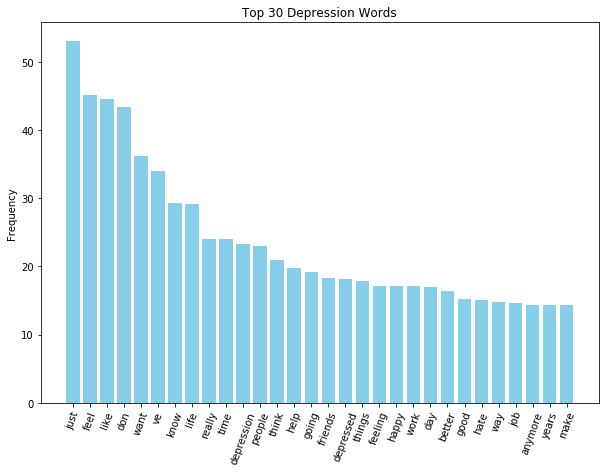

In [17]:
plt.figure(figsize=(10,7))
plt.bar(df1['ReviewText'], df1['count'], color = 'skyblue')
plt.title('Top 30 Depression Words')
plt.ylabel('Frequency')
plt.xticks(rotation=70);

In [18]:
#the exact same code but lets looks for popular PHRASES
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english', ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(depression['stringOG'], 30)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

feel like 15.63683641819756
don know 12.764870229073995
don want 9.623675315849079
just want 7.743596579863491
amp x200b 6.226718009102955
feels like 5.084756468600473
just feel 4.504411414728914
don feel 4.32805913322779
want die 3.9725709431538565
just don 3.928078921394915
like just 3.1641116327877343
felt like 3.1418740595906116
feeling like 3.1120385209832424
don think 2.9780474344084293
like shit 2.7120905511957627
makes feel 2.561012975484983
mental health 2.470324939689775
best friend 2.436342347876093
long time 2.422955312043933
feel better 2.4178130275804195
dont know 2.379170890095806
ve tried 2.340741040802133
feel way 2.242781636564748
don really 2.2354907798425314
video games 2.174429071476005
just tired 2.095985662026947
high school 2.0862035769320024
feel bad 2.0212842288016626
make feel 2.0095135569673794
like don 2.007498912958026


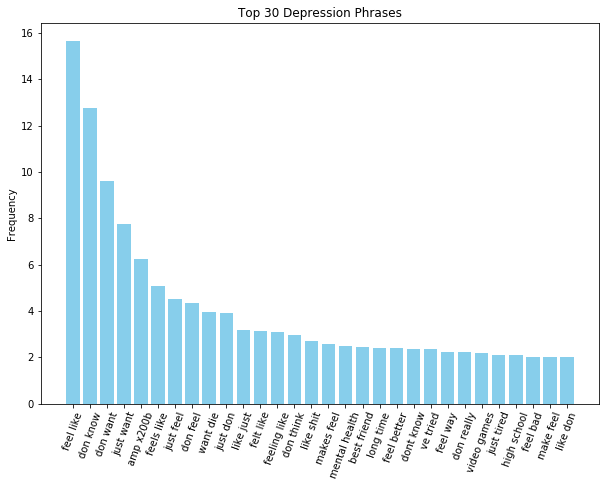

In [19]:
plt.figure(figsize=(10,7))
plt.bar(df2['ReviewText'], df2['count'], color = 'skyblue')
plt.title('Top 30 Depression Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=70);

## Now time for Anxiety!

In [20]:
#merging selftext and title 
anxiety['text'] = anxiety['selftext'] + ' ' + anxiety['title']

In [21]:
#instantiate
tokenizer = RegexpTokenizer(r'\w+') 

In [22]:
#define tokenize function 
def tokenize(text):
    return tokenizer.tokenize(str(text).lower())

#let's apply it
anxiety['tokenized'] = anxiety['text'].apply(tokenize)

In [23]:
anxiety.head()

,Unnamed: 0,subreddit,selftext,title,created_utc,text,tokenized
0,0,Anxiety,"Greetings /r/Anxiety,\n\n\nI apologize for the...",CBD Megathread (June 2019),1.560125e+09,"Greetings /r/Anxiety,\n\n\nI apologize for the...","[greetings, r, anxiety, i, apologize, for, the..."
1,1,Anxiety,What have you accomplished this week? Share yo...,"Wednesday Wins - July 03, 2019",1.562156e+09,What have you accomplished this week? Share yo...,"[what, have, you, accomplished, this, week, sh..."
2,2,Anxiety,I GOT AN OFFER!!!!!!\n\nI went back to pessimi...,[UPDATE] after almost canceling a job intervie...,1.562108e+09,I GOT AN OFFER!!!!!!\n\nI went back to pessimi...,"[i, got, an, offer, i, went, back, to, pessimi..."
3,3,Anxiety,i have severe anxiety and it is really difficu...,i went to a bookstore and got a coffee by myse...,1.562172e+09,i have severe anxiety and it is really difficu...,"[i, have, severe, anxiety, and, it, is, really..."
4,4,Anxiety,This may seem like a small victory or just com...,I just managed to shift from a heart rate of 1...,1.562172e+09,This may seem like a small victory or just com...,"[this, may, seem, like, a, small, victory, or,..."


In [24]:
#removing commas to join
anxiety['texty'] = [[' '.join(i)] for i in anxiety['tokenized']]
#convert to str
anxiety['string'] = [str(i) for i in anxiety['texty']]
#taking out left bracket, right bracket, and apostrophe
anxiety['stringOG'] = [i.replace('[', '').replace(']', '').replace("'", '') for i in anxiety['string']]

In [25]:
anxiety.head()

,Unnamed: 0,subreddit,selftext,title,created_utc,text,tokenized,texty,string,stringOG
0,0,Anxiety,"Greetings /r/Anxiety,\n\n\nI apologize for the...",CBD Megathread (June 2019),1.560125e+09,"Greetings /r/Anxiety,\n\n\nI apologize for the...","[greetings, r, anxiety, i, apologize, for, the...",[greetings r anxiety i apologize for the lack ...,['greetings r anxiety i apologize for the lack...,greetings r anxiety i apologize for the lack o...
1,1,Anxiety,What have you accomplished this week? Share yo...,"Wednesday Wins - July 03, 2019",1.562156e+09,What have you accomplished this week? Share yo...,"[what, have, you, accomplished, this, week, sh...",[what have you accomplished this week share yo...,['what have you accomplished this week share y...,what have you accomplished this week share you...
2,2,Anxiety,I GOT AN OFFER!!!!!!\n\nI went back to pessimi...,[UPDATE] after almost canceling a job intervie...,1.562108e+09,I GOT AN OFFER!!!!!!\n\nI went back to pessimi...,"[i, got, an, offer, i, went, back, to, pessimi...",[i got an offer i went back to pessimism and e...,['i got an offer i went back to pessimism and ...,i got an offer i went back to pessimism and ex...
3,3,Anxiety,i have severe anxiety and it is really difficu...,i went to a bookstore and got a coffee by myse...,1.562172e+09,i have severe anxiety and it is really difficu...,"[i, have, severe, anxiety, and, it, is, really...",[i have severe anxiety and it is really diffic...,['i have severe anxiety and it is really diffi...,i have severe anxiety and it is really difficu...
4,4,Anxiety,This may seem like a small victory or just com...,I just managed to shift from a heart rate of 1...,1.562172e+09,This may seem like a small victory or just com...,"[this, may, seem, like, a, small, victory, or,...",[this may seem like a small victory or just co...,['this may seem like a small victory or just c...,this may seem like a small victory or just com...


## Getting top words and phrases from anxiety

In [26]:
#this codee tfdifs our tokenized 
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(anxiety['stringOG'], 30)
for word, freq in common_words:
    print(word, freq)
    
     
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

#using susan li's code 
#https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

anxiety 49.11782531339766
just 42.39355859764828
like 41.40655995795668
feel 35.84869876217855
don 31.750024341815948
ve 30.741502250227843
know 29.515206565481027
really 26.650512144877474
time 24.564127548751145
people 22.20243168525969
want 21.940241901541796
going 21.75969563781984
help 21.206813869148068
panic 21.10373043866566
anxious 18.190487978608285
day 18.121582309743946
need 17.49284446512258
think 17.465961136626575
feeling 17.299743038991835
work 17.223760550844467
having 16.828376733908843
job 16.706525873296734
things 16.508059842913326
got 16.049411736297667
life 15.467334073650248
attack 15.030819207658585
friends 14.884286641440978
bad 14.482683906390822
getting 13.505408282939355
scared 13.288387354470329


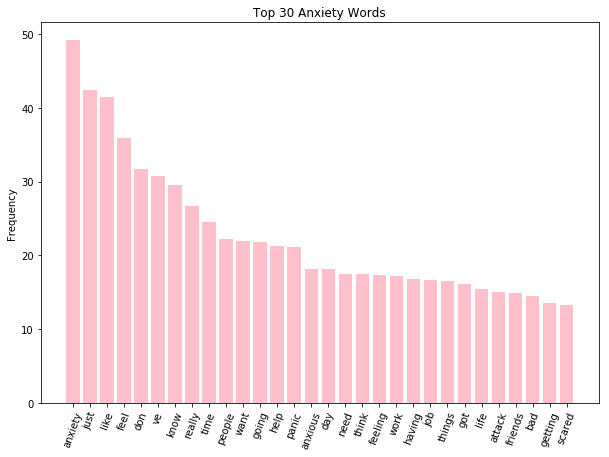

In [27]:
#lets look at a bar chart 
plt.figure(figsize=(10,7))
plt.bar(df1['ReviewText'], df1['count'], color = 'pink')
plt.title('Top 30 Anxiety Words')
plt.ylabel('Frequency')
plt.xticks(rotation=70);

In [28]:
#getting top 30 anxiety phrases

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english', ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(anxiety['stringOG'], 30)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

feel like 13.476875070547583
don know 11.216821682292803
panic attack 7.40966627260586
panic attacks 7.19043730491278
amp x200b 6.414046015267254
don want 5.726253629908669
just want 4.489813754385357
feels like 4.204486844221465
felt like 3.636631103450918
anxiety attack 3.575703600040461
really bad 3.089072993270229
just feel 3.065306802903275
social anxiety 2.957145254430008
health anxiety 2.7325112166287453
heart rate 2.723428626110906
anxiety attacks 2.6845709159952134
anxiety just 2.653198194045601
having anxiety 2.6000074018243975
just don 2.5806207909328704
mental health 2.5386901410994844
makes feel 2.533289371601112
years ago 2.487403347568541
new job 2.4062302081851477
need help 2.321887360530037
anxiety disorder 2.310149043492447
feeling like 2.2943754819138924
help anxiety 2.251893557867905
anxiety depression 2.246339833575483
like just 2.141611679354763
just need 2.12308012993607


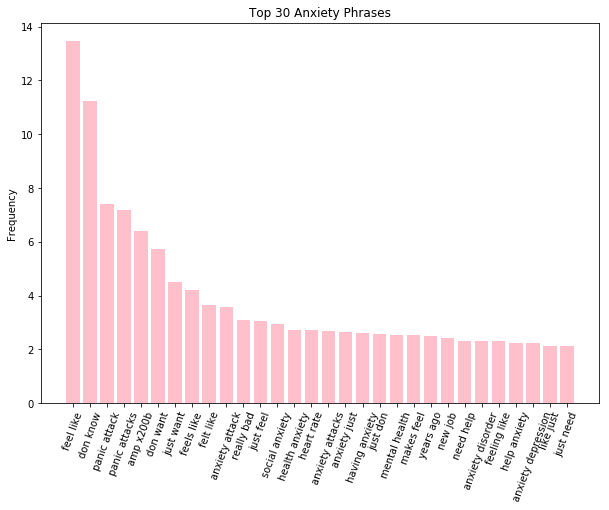

In [29]:
#lets look at a bar chart 
plt.figure(figsize=(10,7))
plt.bar(df2['ReviewText'], df2['count'], color = 'pink')
plt.title('Top 30 Anxiety Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=70);

# Before we look at words and phrases with high correlation, we must consolidate some data 

In [30]:
df1 = anxiety[['subreddit', 'stringOG']]

In [31]:
df2 = depression[['subreddit', 'stringOG']]

In [32]:
df = pd.concat(objs=[df1, df2])

In [33]:
df.head()

,subreddit,stringOG
0,Anxiety,greetings r anxiety i apologize for the lack o...
1,Anxiety,what have you accomplished this week share you...
2,Anxiety,i got an offer i went back to pessimism and ex...
3,Anxiety,i have severe anxiety and it is really difficu...
4,Anxiety,this may seem like a small victory or just com...


In [34]:
df.shape

(1893, 2)

In [35]:
#now we have the full df from both subreddits... lets change the subreddit column to binary
df['subreddit'] = df['subreddit'].map({'Anxiety':0, 'depression': 1})

In [36]:
df['subreddit'].value_counts()


#we're ready to go 

0    970
1    923
Name: subreddit, dtype: int64

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

In [38]:
df.head()

,subreddit,stringOG
0,0,greetings r anxiety i apologize for the lack o...
1,0,what have you accomplished this week share you...
2,0,i got an offer i went back to pessimism and ex...
3,0,i have severe anxiety and it is really difficu...
4,0,this may seem like a small victory or just com...


# The following code will show the process of picking single words with high correlation 

In [39]:
#making the pipeline- this is the best regression and vectorizer based on numerous testing
pipe = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

In [40]:
df.head()

,subreddit,stringOG
0,0,greetings r anxiety i apologize for the lack o...
1,0,what have you accomplished this week share you...
2,0,i got an offer i went back to pessimism and ex...
3,0,i have severe anxiety and it is really difficu...
4,0,this may seem like a small victory or just com...


In [41]:

X = df['stringOG']
y = df['subreddit']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [44]:
pipe.fit(X_train, y_train)

/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [45]:
pipe.named_steps

{'tfidfvectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

In [46]:
#creating coef and features to put in dictionary then creating a df from dict
coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

#Blake's code

In [47]:
#creating column corr to sort it
coef_df.columns = ['corr']
coef_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
depression,30.997363
depressed,12.494191
life,9.810526
happy,4.956201
just,4.731321
sad,4.503554
want,3.984399
nothing,3.884082
all,3.562031
anymore,3.552527


# Let's check for phrases that have high correlation to depression 

In [48]:
#all im changing is n gram range
pipe = make_pipeline(
    TfidfVectorizer(ngram_range = (2,2)),
    LogisticRegression()
)

In [49]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), norm='l2', preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [50]:

coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

In [51]:
#creating column corr to sort it
coef_df.columns = ['corr']
coef_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
want to,4.234122
my life,3.663158
my depression,3.141418
no one,2.184548
tired of,2.140681
be happy,2.070248
to be,2.044419
kill myself,2.043761
to kill,2.019049
don want,2.013174


## Let's now check Anxiety words that have a high correlation 
- First, we need to change the binary variables 

In [52]:
df.head()

,subreddit,stringOG
0,0,greetings r anxiety i apologize for the lack o...
1,0,what have you accomplished this week share you...
2,0,i got an offer i went back to pessimism and ex...
3,0,i have severe anxiety and it is really difficu...
4,0,this may seem like a small victory or just com...


In [53]:
#changing binary- now anxiety is marked 1
df['subreddit'] = df['subreddit'].map({0: 1, 1:0})

In [54]:
df.head()

,subreddit,stringOG
0,1,greetings r anxiety i apologize for the lack o...
1,1,what have you accomplished this week share you...
2,1,i got an offer i went back to pessimism and ex...
3,1,i have severe anxiety and it is really difficu...
4,1,this may seem like a small victory or just com...


In [55]:
pipe = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

In [56]:
X = df['stringOG']
y = df['subreddit']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [59]:
coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

In [60]:
#creating column corr to sort it
coef_df.columns = ['corr']
coef_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
anxiety,985.008166
anxious,12.540984
panic,7.797798
attack,5.055895
this,3.585651
and,3.224910
or,3.112122
go,2.988570
attacks,2.985508
advice,2.780625


## Lastly, we want to see anxiety phrases with high correlation 

In [61]:
pipe = make_pipeline(
    TfidfVectorizer(ngram_range = (2,2)),
    LogisticRegression()
)

In [62]:
pipe.fit(X_train, y_train)
coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['tfidfvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

In [63]:
#creating column corr to sort it
coef_df.columns = ['corr']
coef_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
my anxiety,13.587558
anxiety and,4.075232
panic attacks,3.424619
panic attack,3.372878
with anxiety,2.673127
anxiety is,2.524683
of anxiety,2.466940
anyone else,2.037218
anxiety attack,2.008541
to go,1.987936


In [64]:
df['subreddit'].value_counts(normalize = True)

1    0.512414
0    0.487586
Name: subreddit, dtype: float64